##  Validação Holdout na prática

###  Import libraries


In [2]:
import numpy as np
from sklearn import datasets as ds
from sklearn import tree as tr
from sklearn import metrics as mt
from sklearn import model_selection as ms
from matplotlib import pyplot as plt


### 1.0 Treinamento como o Joaquim: O DS Novato

In [3]:
## Dados sintéticos para produção
n_samples = 20000
n_features = 2
n_informative = 2
n_redundant = 0
random_state = 0

# Gerado Dados para treinamento
X, y = ds.make_classification( n_samples=n_samples, n_features=n_features,
n_informative=n_informative, n_redundant=n_redundant,
random_state=random_state )


In [10]:


# Dados para produção
X, X_prod, y, y_prod = ms.train_test_split( X, y, test_size=0.2 )
#X_train, X_test. y_train, y_test

## Não há separação dos Dados
# Modelo treinado e validado com o dataset de Treinamento
model = tr.DecisionTreeClassifier( max_depth=38 )
model.fit( X, y )


# Previsão sobre os dados de treinamento
yhat = model.predict( X )
acc = mt.accuracy_score( y, yhat )
print( "Accuracy Over Training 80%: {}".format( acc ) )
## Publicação do Modelo em Produção


# Previsão sobre os dados de treinamento
yhat_prod = model.predict( X_prod )
acc_prod = mt.accuracy_score( y_prod, yhat_prod )
print( "Accuracy Over Production 20%: {}".format( acc_prod ) )


Accuracy Over Training 80%: 1.0
Accuracy Over Production 20%: 0.8503125


Accuracy Over Test: 0.85234375


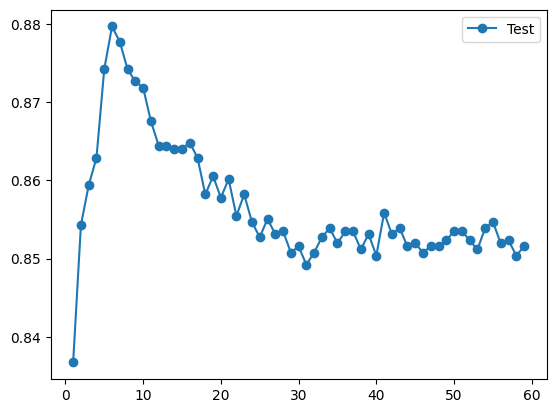

In [12]:
# 2.0 Estratégia Treino-Teste
## Separação entre Treino e Teste
X_train, X_test, y_train, y_test = ms.train_test_split( X, y, test_size=0.2, random_state=random_state )
## Modelo treinado e validado com o dataset de Treinamento
model = tr.DecisionTreeClassifier( max_depth=58 )
model.fit( X_train, y_train )
## Previsão sobre os dados de teste
yhat_test = model.predict( X_test )
acc_test = mt.accuracy_score( y_test, yhat_test )
print( "Accuracy Over Test: {}".format( acc_test ) )
# Escolha de parâmetros do algoritmo
## Modelo treinado e validado com o dataset de Treinamento
values = [i for i in range( 1, 60 )]
test_scores = list()
for i in values:
    model = tr.DecisionTreeClassifier( max_depth=i )
    model.fit( X_train, y_train )
    # Previsão sobre os dados de test
    yhat_test = model.predict( X_test )
    acc_test = mt.accuracy_score( y_test, yhat_test )
    test_scores.append( acc_test )
## plot of train and test scores vs tree depth
plt.plot( values, test_scores, '-o', label='Test' )
plt.legend()
plt.show()

Accuracy Over Production: 0.890625


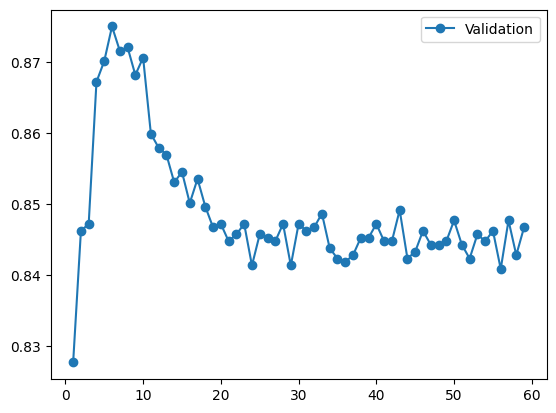

In [14]:

# Publicação do Modelo em Produção
## Modelo treinado e validado com o dataset de Treinamento
model_last = tr.DecisionTreeClassifier( max_depth=7 )
model_last.fit( np.concatenate( (X_train, X_test) ), np.concatenate((y_train, y_test)) )
model_last.fit( X_train, y_train )
## Previsão sobre os dados de produção
yhat_prod = model_last.predict( X_prod )
acc_prod = mt.accuracy_score( y_prod, yhat_prod )
print( "Accuracy Over Production: {}".format( acc_prod ) )
# 3.0 Estratégia Treino-Validation-Teste
## Separação entre Treino e Teste
X_train, X_val, y_train, y_val = ms.train_test_split( X_train, y_train, test_size=0.2, random_state=random_state )
## Modelo treinado e validado com o dataset de Treinamento
values = [i for i in range( 1, 60 )]
val_scores = list()
for i in values:
    model = tr.DecisionTreeClassifier( max_depth=i )
    model.fit( X_train, y_train )
    # Previsão sobre os dados de treinamento
    yhat_val = model.predict( X_val )
    acc_val = mt.accuracy_score( y_val, yhat_val )
    val_scores.append( acc_val )
## plot of train and test scores vs tree depth
plt.plot( values, val_scores, '-o', label='Validation' )
plt.legend()
plt.show()

In [15]:

## Previsão sobre os dados de validacao
yhat_val = model.predict( X_val )
acc_val = mt.accuracy_score( y_val, yhat_val )
print( "Accuracy Over Validation: {}".format( acc_val ) )
## Modelo treinado e validado com o dataset de Treinamento
model_last = tr.DecisionTreeClassifier( max_depth=7 )
model_last.fit( np.concatenate( (X_train, X_val) ), np.concatenate((y_train, y_val)) )
## Previsão sobre os dados de test
yhat_test = model_last.predict( X_test )
acc_test = mt.accuracy_score( y_test, yhat_test )
print( "Accuracy Over Test: {}".format( acc_test ) )
# Previsão sobre os dados de treinamento
yhat_prod = model_last.predict( X_prod )
acc_prod = mt.accuracy_score( y_prod, yhat_prod )
print( "Accuracy Over Production: {}".format( acc_prod ) )

Accuracy Over Validation: 0.8466796875
Accuracy Over Test: 0.877734375
Accuracy Over Production: 0.890625


###  3. Classificação com Overfitting na Classicaçao Aula 30

In [16]:
# Import libraries
import numpy as np
from sklearn import datasets as ds
from sklearn import tree as tr
from sklearn import metrics as mt
from sklearn import model_selection as ms
from matplotlib import pyplot as plt
# 1.0 Treinamento como o Joaquim: O DS Novato
## Dados sintéticos para produção
n_samples = 20000
n_features = 2
n_informative = 2
n_redundant = 0
random_state = 0
# Dados para treinamento
X, y = ds.make_classification( n_samples=n_samples, n_features=n_features,
n_informative=n_informative, n_redundant=n_redundant, random_state=random_state )

X, X_prod, y, y_prod = ms.train_test_split( X, y, test_size=0.2 )
# ## Não há separação dos Dados
# Modelo treinado e validado com o dataset de Treinamento
model = tr.DecisionTreeClassifier( max_depth=38 )
model.fit( X, y )
# Previsão sobre os dados de treinamento
yhat = model.predict( X )
acc = mt.accuracy_score( y, yhat )
print( "Accuracy Over Training: {}".format( acc ) )


Accuracy Over Training: 1.0


In [18]:
# ## Publicação do Modelo em Produção
# Previsão sobre os dados de treinamento
yhat_prod = model.predict( X_prod )
acc_prod = mt.accuracy_score( y_prod, yhat_prod )
print( "Accuracy Over Production: {}".format( acc_prod ) )


Accuracy Over Production: 0.84425


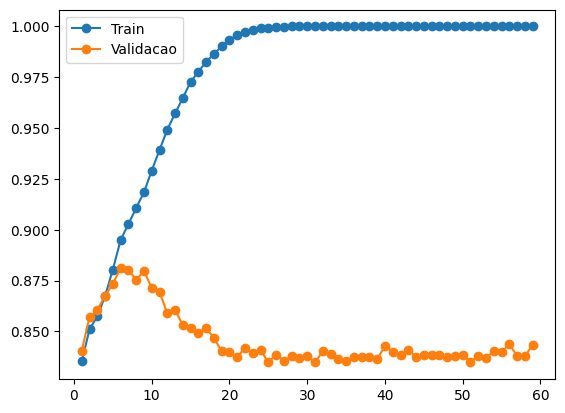

In [19]:
# # 2.0 Estratégia Treino-Validacao-Teste
# Separação entre Treino e Teste
X_train, X_test, y_train, y_test = ms.train_test_split( X, y, test_size=0.2, random_state=random_state )
# Separação entre Treino e Validacao
X_train, X_val, y_train, y_val = ms.train_test_split( X_train, y_train, test_size= 0.2, random_state=random_state )

# ## Escolha de parâmetros do algoritmo
# Modelo treinado e validado com o dataset de Treinamento
values = [i for i in range( 1, 60 )]
train_scores, val_scores = list(), list()
for i in values:
    model = tr.DecisionTreeClassifier( max_depth=i )
    model.fit( X_train, y_train )
    # Previsão sobre os dados de treinamento
    yhat_train = model.predict( X_train )
    acc_train = mt.accuracy_score( y_train, yhat_train )
    train_scores.append( acc_train )
    
    # Previsão sobre os dados de test
    yhat_val = model.predict( X_val )
    acc_val = mt.accuracy_score( y_val, yhat_val )
    
    val_scores.append( acc_val )
# plot of train and test scores vs tree depth
plt.plot( values, train_scores, '-o', label='Train' )
plt.plot( values, val_scores, '-o', label='Validacao' )
plt.legend()
plt.show()

In [20]:

# Modelo treinado e validado com o dataset de Treinamento
model_last = tr.DecisionTreeClassifier( max_depth=4 )
model_last.fit( X_train , y_train )
# Previsão sobre os dados de treinamento
yhat_train = model_last.predict( X_train )
acc_train = mt.accuracy_score( y_train, yhat_train )
print( "Accuracy Over Training: {}".format( acc_train ) )
# Previsão sobre os dados de validacao
yhat_val = model_last.predict( X_val )
acc_val = mt.accuracy_score( y_val, yhat_val )
print( "Accuracy Over Validacao: {}".format( acc_val ) )
# Previsão sobre os dados de test
yhat_test = model_last.predict( X_test )
acc_test = mt.accuracy_score( y_test, yhat_test )
print( "Accuracy Over Testing: {}".format( acc_test ) )
# Previsão sobre os dados de treinamento
yhat_prod = model_last.predict( X_prod )
acc_prod = mt.accuracy_score( y_prod, yhat_prod )
print( "Accuracy Over Producao: {}".format( acc_prod ) )


Accuracy Over Training: 0.86748046875
Accuracy Over Validacao: 0.867578125
Accuracy Over Testing: 0.87125
Accuracy Over Producao: 0.8675


### 4. O problema do Overfitting na Regressão (AULA 31)

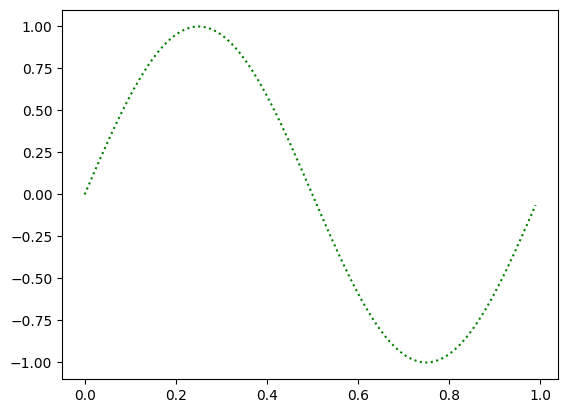

In [23]:
# # 0.0 Import Libraries
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn import model_selection as ms
# # 1.0 Synthetic regression dataset
hidden_law = np.vectorize(lambda x: math.sin(2*math.pi*x)) # made to run on vectors
x_all = np.arange(0, 1, 0.01)
y_hidden = hidden_law(x_all)
plt.plot(x_all, y_hidden, ':g');

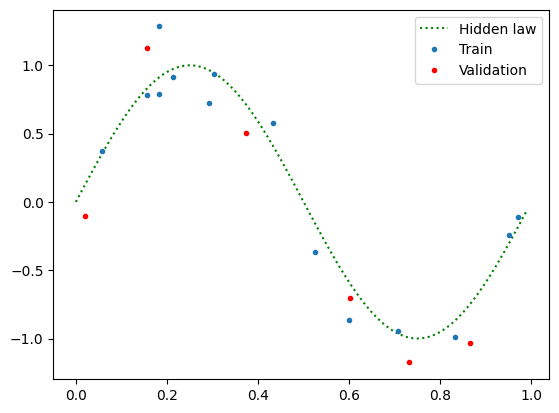

In [24]:

np.random.seed(42) # to make repeatable
noise = 0.2
samples = 20
# dataset
x = np.random.rand( samples )
y = np.sin( 2*np.pi*x ) + noise*np.random.randn( samples )
# split training and test dataset
x_train, x_valid, y_train, y_valid = ms.train_test_split( x, y, test_size=0.3 )
plt.plot(x_all, y_hidden, ':g')
plt.plot(x_train, y_train, '.')
plt.plot(x_valid, y_valid, 'r.')
plt.legend(['Hidden law', 'Train', 'Validation']);


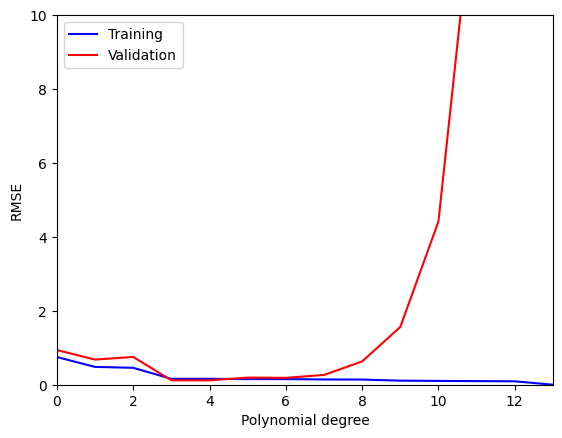

In [27]:
# ## Treinamento
max_poly_degree = 14
poly_degrees = range(max_poly_degree)
polys = []
for p in poly_degrees:
    poly_model = np.polyfit( x_train, y_train, p )
    polys.append( poly_model )
rmse_train = np.zeros( max_poly_degree )
rmse_val = np.zeros( max_poly_degree)
for p in poly_degrees:
    # predict over training dataset
    yhat_train = np.polyval( polys[p], x_train)
    rmse_train[p] = np.sqrt( np.mean( np.square( yhat_train - y_train ) ) )
    # predict over validation dataset
    yhat_val = np.polyval( polys[p], x_valid )
    rmse_val[p] = np.sqrt( np.mean( np.square( yhat_val - y_valid ) ) )
plt.plot( poly_degrees, rmse_train, 'b' )
plt.plot( poly_degrees, rmse_val, 'r' )
plt.axis( ( 0, max_poly_degree-1, 0, 10 ) )
plt.legend(['Training', 'Validation'])
plt.xlabel('Polynomial degree')
plt.ylabel('RMSE');

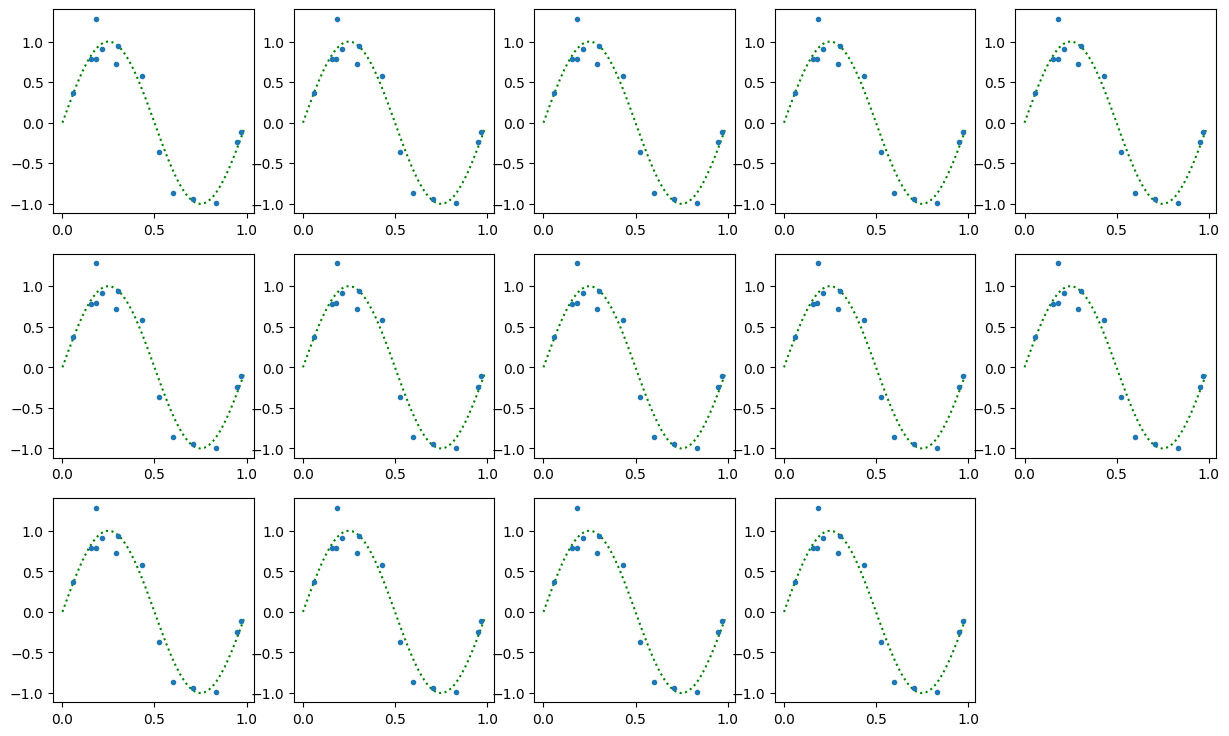

In [28]:
plt.figure(figsize=(15, 9))
for p in poly_degrees:
    plt.subplot(3, 5, p+1)
    y_pol = np.polyval(polys[p], x_all)
    plt.plot(x_all, y_hidden, ':g')
    plt.plot(x_train, y_train, '.')